**Exploratory Data Analysis on Global Terrorism Dataset**

DataSet Link - https://bit.ly/2TK5Xn5

**Importing Python Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

**Loading the Dataset:**

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv") #Reading the Dataset
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
print(data.columns.values)#Features of dataset

['eventid' 'iyear' 'imonth' 'iday' 'approxdate' 'extended' 'resolution'
 'country' 'country_txt' 'region' 'region_txt' 'provstate' 'city'
 'latitude' 'longitude' 'specificity' 'vicinity' 'location' 'summary'
 'crit1' 'crit2' 'crit3' 'doubtterr' 'alternative' 'alternative_txt'
 'multiple' 'success' 'suicide' 'attacktype1' 'attacktype1_txt'
 'attacktype2' 'attacktype2_txt' 'attacktype3' 'attacktype3_txt'
 'targtype1' 'targtype1_txt' 'targsubtype1' 'targsubtype1_txt' 'corp1'
 'target1' 'natlty1' 'natlty1_txt' 'targtype2' 'targtype2_txt'
 'targsubtype2' 'targsubtype2_txt' 'corp2' 'target2' 'natlty2'
 'natlty2_txt' 'targtype3' 'targtype3_txt' 'targsubtype3'
 'targsubtype3_txt' 'corp3' 'target3' 'natlty3' 'natlty3_txt' 'gname'
 'gsubname' 'gname2' 'gsubname2' 'gname3' 'gsubname3' 'motive'
 'guncertain1' 'guncertain2' 'guncertain3' 'individual' 'nperps'
 'nperpcap' 'claimed' 'claimmode' 'claimmode_txt' 'claim2' 'claimmode2'
 'claimmode2_txt' 'claim3' 'claimmode3' 'claimmode3_txt' 'compclaim'


In [4]:
dataset = data[['iyear', 'imonth', 'iday', 'country', 'provstate', 'region_txt', 'city', 'latitude', 'longitude', 'target1', 'summary', 'gname', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound', 'motive']]
dataset.head(5)

,iyear,imonth,iday,country,provstate,region_txt,city,latitude,longitude,target1,summary,gname,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,motive
0,1970,7,2,58,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Julio Guzman,NaN,MANO-D,Assassination,Private Citizens & Property,Unknown,1.0,0.0,NaN
1,1970,0,0,130,Federal,North America,Mexico city,19.371887,-99.086624,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,NaN
2,1970,1,0,160,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Employee,NaN,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0,NaN
3,1970,1,0,78,Attica,Western Europe,Athens,37.997490,23.762728,U.S. Embassy,NaN,Unknown,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,NaN
4,1970,1,0,101,Fukouka,East Asia,Fukouka,33.580412,130.396361,U.S. Consulate,NaN,Unknown,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,NaN


In [5]:
print(dataset.shape)#Provides the Shape of Data

(181691, 18)


In [6]:
dataset.isna().sum()# To check whether the null values are present or not.

iyear                   0
imonth                  0
iday                    0
country                 0
provstate             421
region_txt              0
city                  434
latitude             4556
longitude            4557
target1               636
summary             66129
gname                   0
attacktype1_txt         0
targtype1_txt           0
weaptype1_txt           0
nkill               10313
nwound              16311
motive             131130
dtype: int64

**Understanding the Data:**

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country          181691 non-null  int64  
 4   provstate        181270 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   target1          181055 non-null  object 
 10  summary          115562 non-null  object 
 11  gname            181691 non-null  object 
 12  attacktype1_txt  181691 non-null  object 
 13  targtype1_txt    181691 non-null  object 
 14  weaptype1_txt    181691 non-null  object 
 15  nkill            171378 non-null  float64
 16  nwound           165380 non-null  floa

In [8]:
data.describe(include = 'all')#Describes the data with mean, median, mode.

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


**Exploratory Data Analysis :**

In [9]:
print("Country with most Attacks: ",dataset['country'].value_counts().idxmax())
print('City with most Attacks: ',dataset['city'].value_counts().index[1])
print("Region with the most Attacks:",dataset['region_txt'].value_counts().idxmax())
print("Year with the most Attacks:",dataset['iyear'].value_counts().idxmax())
print("Month with the most Attacks:",dataset['imonth'].value_counts().idxmax())
print("Group with the most Attacks:",dataset['gname'].value_counts().index[1])
print("Most Attack Types:",dataset['attacktype1_txt'].value_counts().idxmax())

Country with most Attacks:  95
City with most Attacks:  Baghdad
Region with the most Attacks: Middle East & North Africa
Year with the most Attacks: 2014
Month with the most Attacks: 5
Group with the most Attacks: Taliban
Most Attack Types: Bombing/Explosion


In [10]:
dataset['iyear'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: iyear, dtype: int64

**Visualization:**

**Bar Plot-**

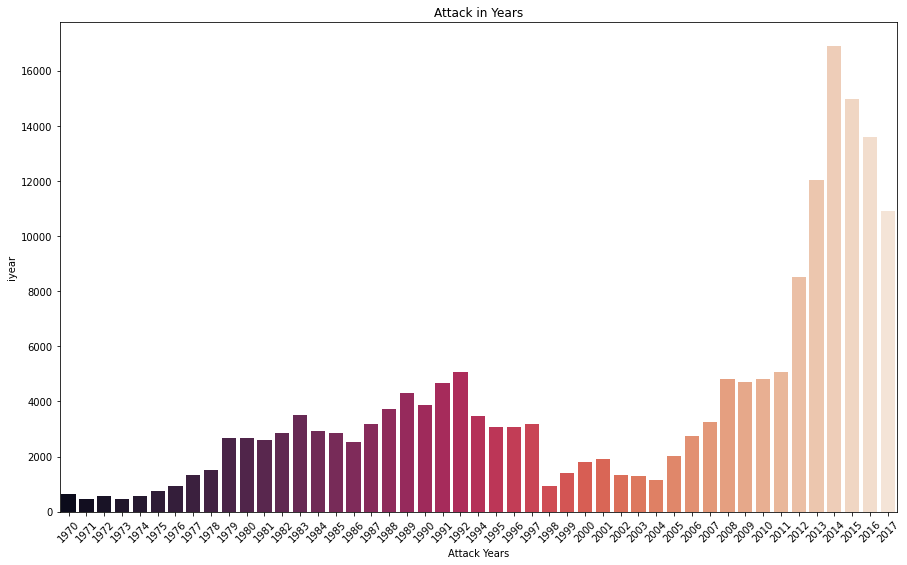

In [11]:
#Visualization of Attack in years through Bar Graph
x_year = dataset['iyear'].unique()
y_year = dataset['iyear'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,9))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of Attacks each year")
plt.xticks(rotation=45)
sns.barplot(x = x_year, y = y_year, palette= 'rocket')
plt.show()

**Count Plot -**

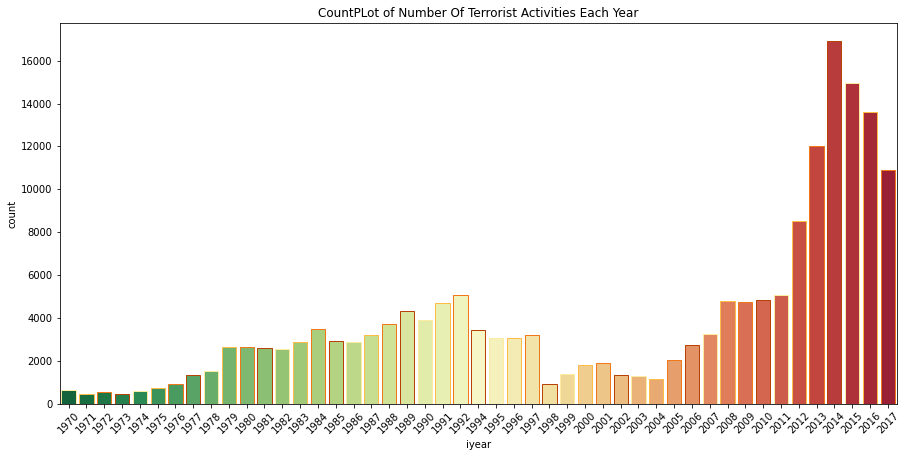

In [12]:
# plotting CountPLot for Number Of Terrorist Activities Each Year
plt.subplots(figsize=(15,7))
sns.countplot('iyear', data=dataset, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 4))
plt.xticks(rotation=45)
plt.title('CountPLot of Number Of Terrorist Activities Each Year')
plt.show()

**Area Plot -** 

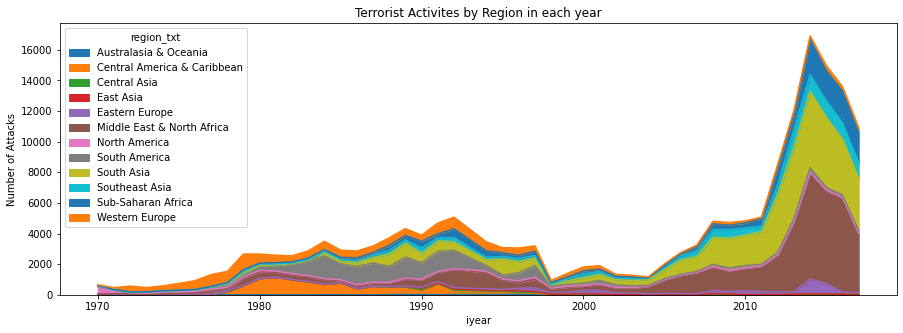

In [13]:
#Visualization for Terrorist Activites by Region in each year
pd.crosstab(dataset.iyear,dataset.region_txt).plot(kind='area',figsize=(15,5))
plt.title('Terrorist Activites by Region in each year')
plt.ylabel("Number of Attacks")
plt.show()

In [14]:
from wordcloud import WordCloud
from scipy import signal

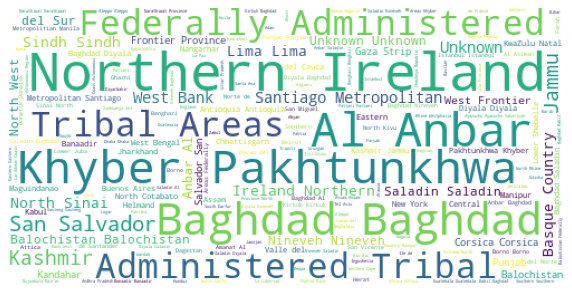

In [15]:
#Visualization of Cities through Worldcloud
cities = dataset.provstate.dropna(False)
plt.subplots(figsize =(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [16]:
dataset['nwound'] = dataset['nwound'].fillna(0).astype(int)
dataset['nkill'] = dataset['nkill'].fillna(0).astype(int)
dataset['casualities'] = dataset['nkill'] + dataset['nwound']

**Taking only 30 countries for visualization**

In [17]:
dataset_copy = dataset.sort_values(by='casualities',ascending=False)[:40]

In [18]:
dataset_copy.corr()

,iyear,imonth,iday,country,latitude,longitude,nkill,nwound,casualities
iyear,1.000000,-0.007232,-0.109231,0.020366,0.125148,0.065363,0.151660,-0.210870,-0.162074
imonth,-0.007232,1.000000,-0.209591,-0.070332,0.035762,-0.261918,0.192078,0.121539,0.148148
iday,-0.109231,-0.209591,1.000000,-0.000228,0.048502,0.265903,-0.161730,-0.043818,-0.071522
country,0.020366,-0.070332,-0.000228,1.000000,-0.203783,-0.240608,0.058096,0.046316,0.053499
latitude,0.125148,0.035762,0.048502,-0.203783,1.000000,-0.211684,-0.076435,0.093320,0.069901
longitude,0.065363,-0.261918,0.265903,-0.240608,-0.211684,1.000000,-0.172009,-0.236810,-0.249050
nkill,0.151660,0.192078,-0.161730,0.058096,-0.076435,-0.172009,1.000000,0.377770,0.539393
nwound,-0.210870,0.121539,-0.043818,0.046316,0.093320,-0.236810,0.377770,1.000000,0.983424
casualities,-0.162074,0.148148,-0.071522,0.053499,0.069901,-0.249050,0.539393,0.983424,1.000000


**Generating Heatmap for correlation plot :**

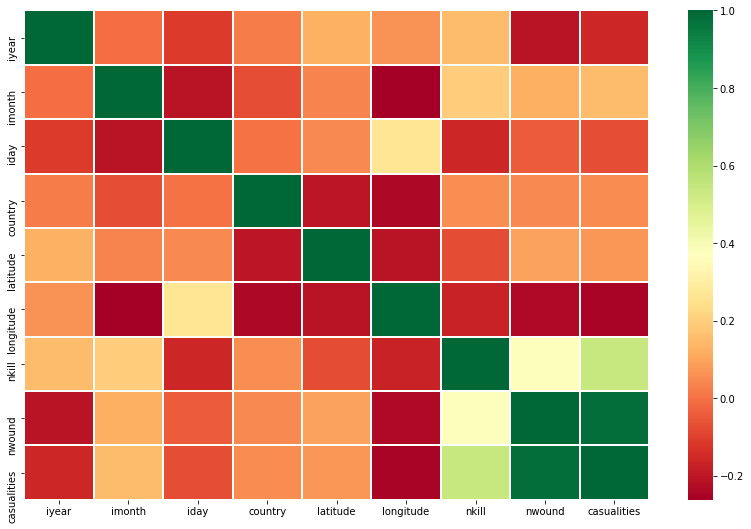

In [19]:
plt.figure(figsize=[14, 9])
sns.heatmap(dataset_copy.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

In [20]:
attack_c = dataset.country.value_counts()[:14]
attack_c

95     24636
153    14368
4      12731
92     11960
45      8306
160     6908
159     6096
61      5320
603     5235
209     4292
182     4142
147     3907
205     3849
228     3347
Name: country, dtype: int64

**Countries Affected by Terrorism (Countries Vs Count)**

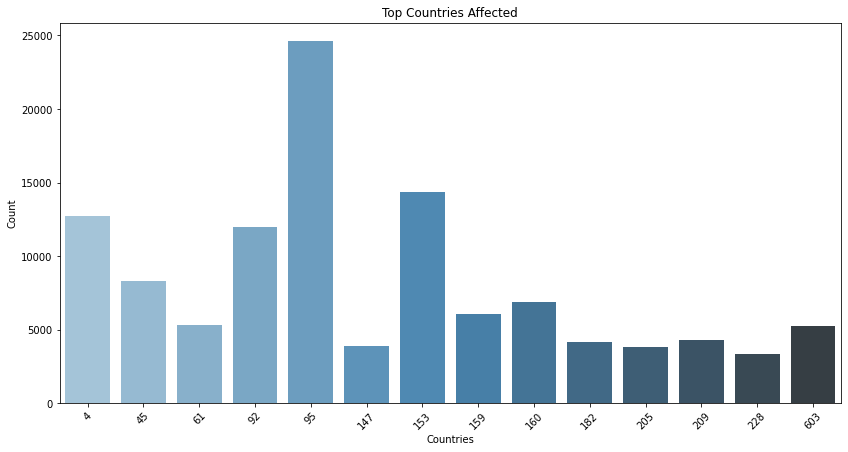

In [21]:
#Plotting Graph for Countries Affected by Terrorism (Countries Vs Count)
plt.subplots(figsize=(14,7))
sns.barplot(attack_c.index,attack_c.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

In [22]:
attack_g = dataset.gname.value_counts()[1:15]
attack_g

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: gname, dtype: int64

**Groups involving most in Terrorism -**

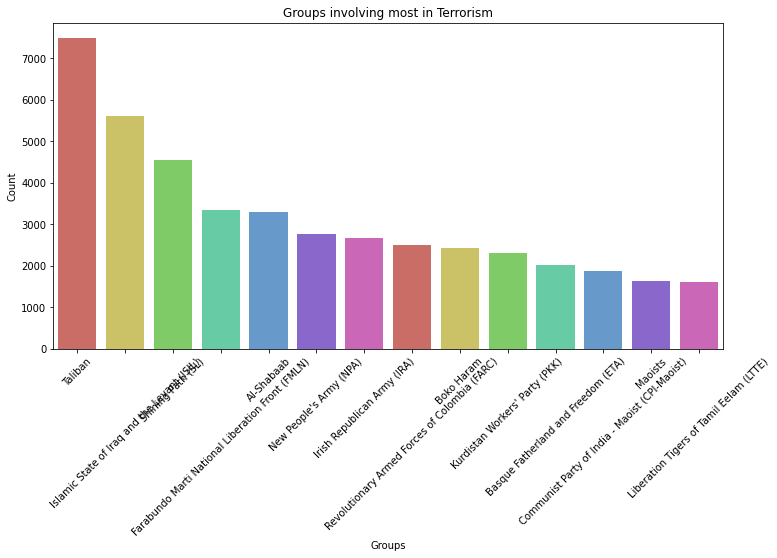

In [23]:
#Plotting Graph for Groups involving most in Terrorism
plt.subplots(figsize=(12,6))
sns.barplot(attack_g.index,attack_g.values,palette=sns.color_palette("hls", 7))
plt.title('Groups involving most in Terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

**Terrorist group names and killed each year -**  

In [24]:
Group_killed= dataset[['gname','nkill']].groupby(['gname'],axis=0).sum().sort_values('nkill', ascending=False).head(15)
Group_killed
#nkill - killed; gname - Group

,nkill
gname,
Unknown,112367
Islamic State of Iraq and the Levant (ISIL),38923
Taliban,29410
Boko Haram,20328
Shining Path (SL),11601
Liberation Tigers of Tamil Eelam (LTTE),10989
Al-Shabaab,9330
Farabundo Marti National Liberation Front (FMLN),8065
Nicaraguan Democratic Force (FDN),6662


**Top Countries affected(Cities Vs Number of Attacks)** 

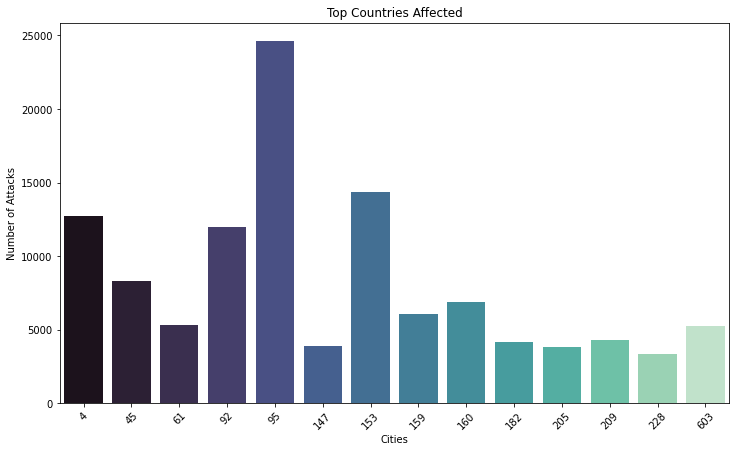

In [25]:
# Plotting graph for Top Countries affected(Cities Vs Number of Attacks)
plt.subplots(figsize=(12,7))
sns.barplot(attack_c.index,attack_c.values,palette="mako")
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 45)
plt.show()

**Types of Attack :**

In [26]:
Type_of_Attach = dataset.attacktype1_txt.value_counts()[:15]
Type_of_Attach

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

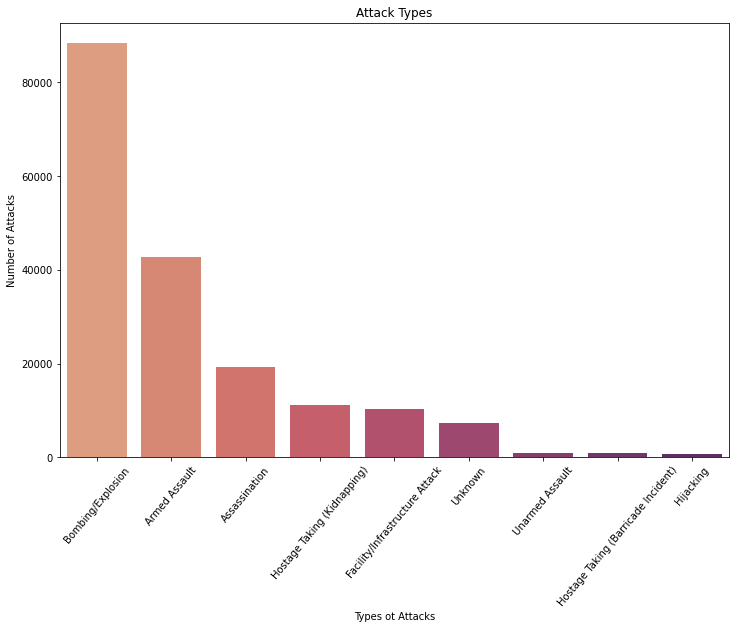

In [27]:
#Plotting Graph for Types of Attack

plt.subplots(figsize=(12,8))
sns.barplot(Type_of_Attach.index,Type_of_Attach.values,palette="flare")
plt.title('Attack Types')
plt.xlabel('Types ot Attacks')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 50)
plt.show()

**People Killed in each Attack Types -**

In [28]:
Killed_by_Attack = dataset[['attacktype1_txt','nkill']].groupby(["attacktype1_txt"],axis=0).sum()
Killed_by_Attack

,nkill
attacktype1_txt,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


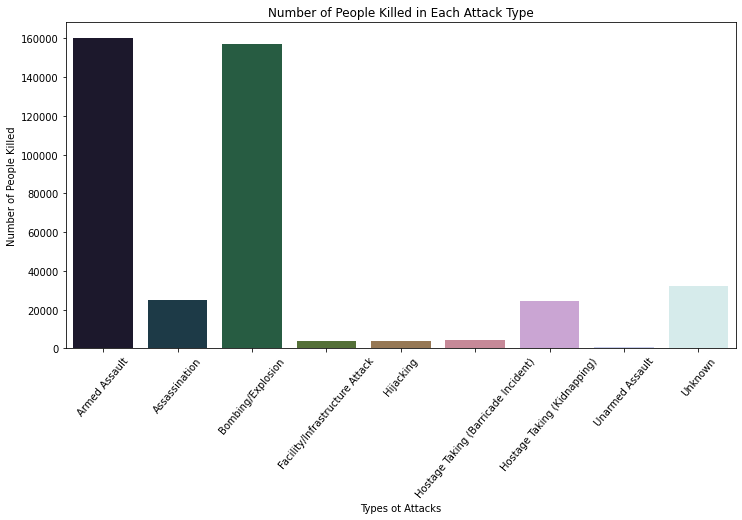

In [29]:
#Plotting Graph for Number of People Killed in Each Attack Type
plt.subplots(figsize=(12,6))
sns.barplot(Killed_by_Attack.index, Killed_by_Attack.nkill.values,palette="cubehelix")
plt.title('Number of People Killed in Each Attack Type')
plt.xlabel('Types ot Attacks')
plt.ylabel('Number of People Killed')
plt.xticks(rotation= 50)
plt.show()